## Random Forest Regression vs Graussian Process Regression 
This notebook, prepared for MIT course 2s986 (Fall 2020), provides regression examples for:
- Random Forest Regrssion <https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html>  
- Gaussian Process Regression <https://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process>





In [1]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, Matern
import matplotlib.pyplot as plt

### Dataset 1 - Sine Funtion 
The first dataset we will be examining is sampling $f(x) = \sin(x)$


#### Small Dataset (10 points)

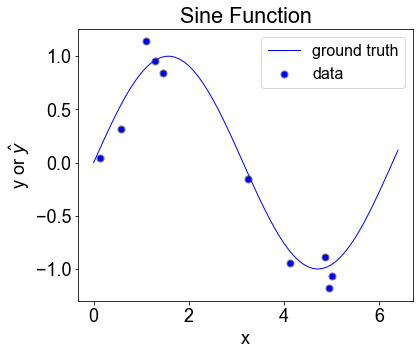

In [2]:
# Create a random dataset
rng = np.random.RandomState(10)
X_end = 6.5
X_train = np.sort(X_end * rng.rand(10, 1), axis=0)
X_test = np.arange(0.0, X_end, 0.1)[:, np.newaxis]

y_train = np.sin(X_train).ravel()
y_train += 0.5 * (0.5 - rng.rand(len(X_train)))
y_test = np.sin(X_test).ravel()

plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
# Plot the results
plt.figure(figsize=(6, 5))
plt.scatter(X_train, y_train, s=50, edgecolor="gray", c="blue", label="data")
plt.plot(X_test, y_test, color="blue", label="ground truth", linewidth=1)
plt.xlabel("x")
plt.ylabel(r"y or $\^y$")
plt.title("Sine Function")
plt.legend(fontsize = 16)
plt.show()

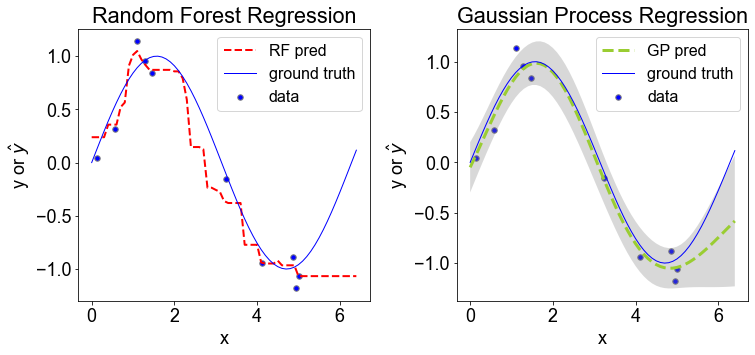

In [3]:
# Fit Random Forest regression model
regr_RF = RandomForestRegressor()
regr_RF.fit(X_train, y_train)
y_test_RFpred = regr_RF.predict(X_test)

gp_kernel = RBF() + WhiteKernel()
regr_GP = GaussianProcessRegressor(kernel=gp_kernel)
regr_GP.fit(X_train, y_train)
y_test_GPpred, y_test_GPstd = regr_GP.predict(X_test, return_std=True)


plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].plot(X_test, y_test_RFpred, '--', color="red", label="RF pred", linewidth=2)
axes[1].plot(X_test, y_test_GPpred, '--', color="yellowgreen", label="GP pred", linewidth=3)
axes[1].fill(np.concatenate([X_test, X_test[::-1]]),
             np.concatenate([y_test_GPpred - y_test_GPstd,
                            (y_test_GPpred + y_test_GPstd)[::-1]]), alpha=.3, fc='gray', ec='None')

for i in range(len(axes)):
    axes[i].scatter(X_train, y_train, s=30, edgecolor="gray", c="blue", label="data")
    axes[i].plot(X_test, y_test, color="blue", label="ground truth", linewidth=1)
    axes[i].set_xlabel("x")
    axes[i].set_ylabel(r"y or $\^y$")
    axes[i].legend(fontsize = 16)
    
axes[0].set_title("Random Forest Regression")
axes[1].set_title("Gaussian Process Regression")

plt.subplots_adjust(wspace = 0.3)
plt.show()


In [4]:
from sklearn.metrics import mean_squared_error
def plot_predictions(y, y_hat, labels):
 
  
    plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
    y, y_hat, labels = list(
        map(
            lambda l: l if isinstance(l, list) else [l],
            [y, y_hat, labels]))
    color_list = ['blue', 'red']
    n_plots = len(y)
    y_min = min([min(z) for z in y])
    y_max = max([max(z) for z in y])
    lims = (y_min, y_max)
    fig, ax = plt.subplots(
        1, n_plots, figsize=(6*n_plots, 5),
        squeeze=False, sharex=True, sharey=True)
    for axis, target, prediction, label, color in zip(ax[0, :], y, y_hat, labels, color_list):
        # Scatter plot
        axis.scatter(target, prediction, alpha=0.3, c = color)

        # Title and labels
        rmse_value = np.sqrt(mean_squared_error(target, prediction))
        title = label + " (RMSE=%.3f)" % rmse_value
        axis.set_title(title)
        axis.set_xlabel('Ground Truth)')
        axis.set_ylabel('Prediction')
        axis.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
        axis.yaxis.set_tick_params(which='both', labelleft=True)

    plt.subplots_adjust(wspace = 0.3)
    plt.show()


Test data root mean squared error:


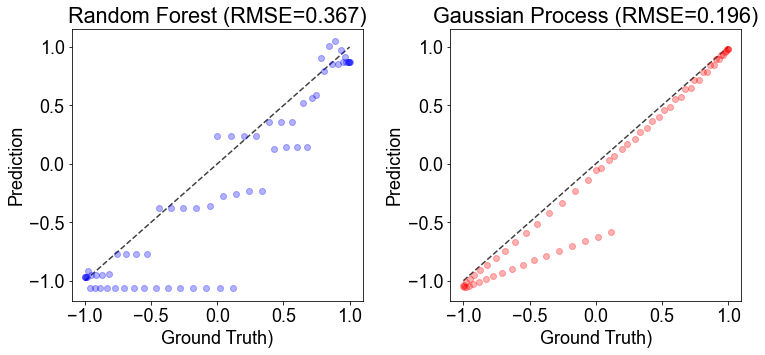

In [5]:
print('Test data root mean squared error:' )
plot_predictions([y_test, y_test], [y_test_RFpred, y_test_GPpred],    labels=['Random Forest', 'Gaussian Process'])

#### Larger Dataset (100 points)

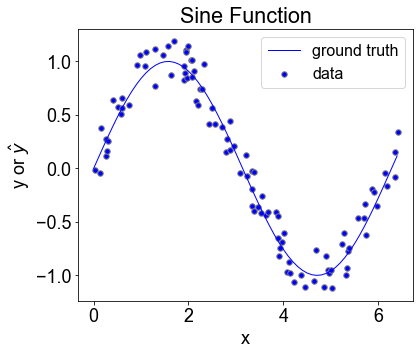

In [6]:
# Create a random dataset
rng = np.random.RandomState(10)
X_end = 6.5
X_train = np.sort(X_end * rng.rand(100, 1), axis=0)
X_test = np.arange(0.0, X_end, 0.1)[:, np.newaxis]

y_train = np.sin(X_train).ravel()
y_train += 0.5 * (0.5 - rng.rand(len(X_train)))
y_test = np.sin(X_test).ravel()


plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
# Plot the results
plt.figure(figsize=(6, 5))
plt.scatter(X_train, y_train, s=30, edgecolor="gray", c="blue", label="data")
plt.plot(X_test, y_test, color="blue", label="ground truth", linewidth=1)
plt.xlabel("x")
plt.ylabel(r"y or $\^y$")
plt.title("Sine Function")
plt.legend(fontsize = 16)
plt.show()

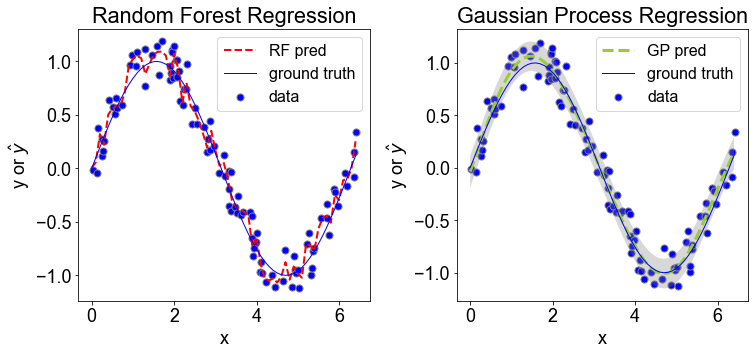

In [7]:
# Fit Random Forest regression model
regr_RF = RandomForestRegressor()
regr_RF.fit(X_train, y_train)
y_test_RFpred = regr_RF.predict(X_test)

gp_kernel = RBF() + WhiteKernel()
regr_GP = GaussianProcessRegressor(kernel=gp_kernel)
regr_GP.fit(X_train, y_train)
y_test_GPpred, y_test_GPstd = regr_GP.predict(X_test, return_std=True)



plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].plot(X_test, y_test_RFpred, '--', color="red", label="RF pred", linewidth=2)
axes[1].plot(X_test, y_test_GPpred, '--', color="yellowgreen", label="GP pred", linewidth=3)
axes[1].fill(np.concatenate([X_test, X_test[::-1]]),
             np.concatenate([y_test_GPpred - y_test_GPstd,
                            (y_test_GPpred + y_test_GPstd)[::-1]]), alpha=.3, fc='gray', ec='None')

for i in range(len(axes)):
    axes[i].scatter(X_train, y_train, s=50, edgecolor="gray", c="blue", label="data")
    axes[i].plot(X_test, y_test, color="blue", label="ground truth", linewidth=1)
    axes[i].set_xlabel("x")
    axes[i].set_ylabel(r"y or $\^y$")
    axes[i].legend(fontsize = 16)
    
axes[0].set_title("Random Forest Regression")
axes[1].set_title("Gaussian Process Regression")

plt.subplots_adjust(wspace = 0.3)
plt.show()


Test data root mean squared error:


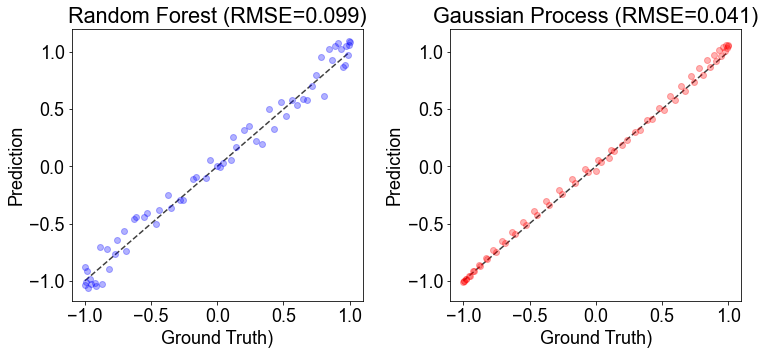

In [8]:
print('Test data root mean squared error:' )
plot_predictions([y_test, y_test], [y_test_RFpred, y_test_GPpred],    labels=['Random Forest', 'Gaussian Process'])

### Dataset 2 - Fermi_Dirac statistics


The second dataset we will be examining is sampling the distribution of specific heat ($c(T)$) vs temperature ($T$) during phase transition. Following the Landau theory, the specific heat can be discribed as follows:
\begin{cases} 
      a*T + \epsilon ,& T<T_{c} \\
      0 +\epsilon,& T>T_{c}  
   \end{cases}


where $a$ is some coefficient, $\epsilon$ is a normally distributed experimental noise. Our goal is to **approximate** this function $c(T)$ by both Random Forest and Gaussian Process regression.


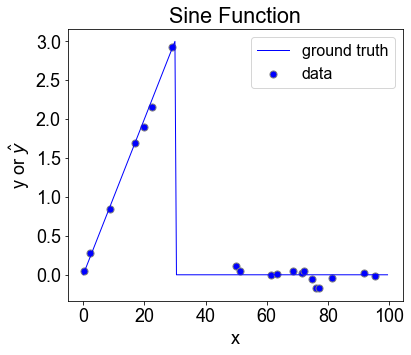

In [9]:
rng = np.random.RandomState(10)
def step_function(T, Tc, a , eps):
    y = []
    for i in T: 
        if i <= Tc:
            y.append (a*i + eps*np.random.normal (0,1, 1))
        else: 
            y.append (eps*np.random.normal (0,1, 1))
    return np.array(y)        
    
X_train = np.sort(100* rng.rand(20, 1), axis=0)
y_train = step_function (X_train, Tc= 30, a = 0.1 , eps = 0.1)
y_train = y_train.ravel()
X_test = np.arange(0.0, 100, 0.5)[:, np.newaxis]
y_test = step_function (X_test, Tc= 30, a = 0.1 , eps = 0)
y_train = y_train.ravel()


plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
# Plot the results
plt.figure(figsize=(6, 5))
plt.scatter(X_train, y_train, s=50, edgecolor="gray", c="blue", label="data")
plt.plot(X_test, y_test, color="blue", label="ground truth", linewidth=1)
plt.xlabel("x")
plt.ylabel(r"y or $\^y$")
plt.title("Sine Function")
plt.legend(fontsize = 16)
plt.show()

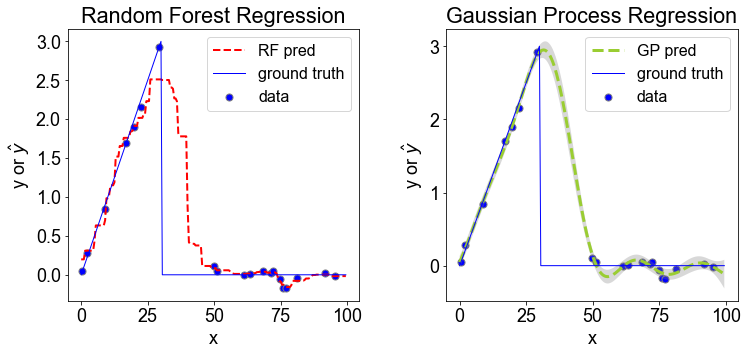

In [10]:
# Fit Random Forest regression model
regr_RF = RandomForestRegressor()
regr_RF.fit(X_train, y_train)
y_test_RFpred = regr_RF.predict(X_test)

gp_kernel = RBF() + WhiteKernel()
regr_GP = GaussianProcessRegressor(kernel=gp_kernel)
regr_GP.fit(X_train, y_train)
y_test_GPpred, y_test_GPstd = regr_GP.predict(X_test, return_std=True)


plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].plot(X_test, y_test_RFpred, '--', color="red", label="RF pred", linewidth=2)
axes[1].plot(X_test, y_test_GPpred, '--', color="yellowgreen", label="GP pred", linewidth=3)
axes[1].fill(np.concatenate([X_test, X_test[::-1]]),
             np.concatenate([y_test_GPpred - y_test_GPstd,
                            (y_test_GPpred + y_test_GPstd)[::-1]]), alpha=.3, fc='gray', ec='None')

for i in range(len(axes)):
    axes[i].scatter(X_train, y_train, s=50, edgecolor="gray", c="blue", label="data")
    axes[i].plot(X_test, y_test, color="blue", label="ground truth", linewidth=1)
    axes[i].set_xlabel("x")
    axes[i].set_ylabel(r"y or $\^y$")
    axes[i].legend(fontsize = 16)
    
axes[0].set_title("Random Forest Regression")
axes[1].set_title("Gaussian Process Regression")

plt.subplots_adjust(wspace = 0.3)
plt.show()


Test data root mean squared error:


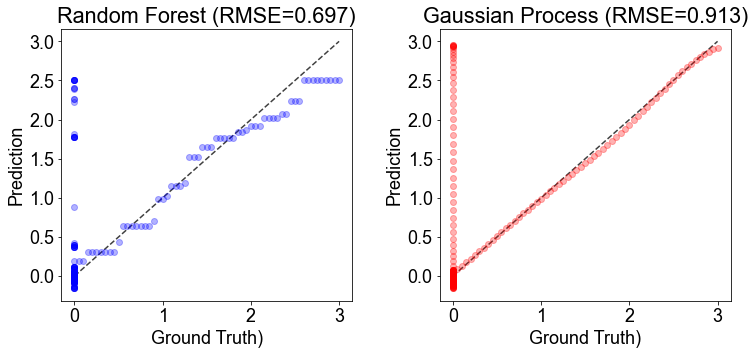

In [11]:
print('Test data root mean squared error:' )
plot_predictions([y_test, y_test], [y_test_RFpred, y_test_GPpred],    labels=['Random Forest', 'Gaussian Process'])

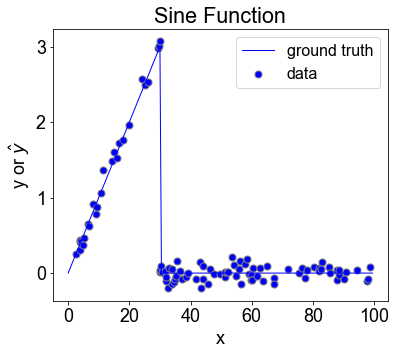

In [12]:
X_train = np.sort(100* rng.rand(100, 1), axis=0)
y_train = step_function (X_train, Tc= 30, a = 0.1 , eps = 0.1)
y_train = y_train.ravel()
X_test = np.arange(0.0, 100, 0.5)[:, np.newaxis]
y_test = step_function (X_test, Tc= 30, a = 0.1 , eps = 0)
y_train = y_train.ravel()


plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
# Plot the results
plt.figure(figsize=(6, 5))
plt.scatter(X_train, y_train, s=50, edgecolor="gray", c="blue", label="data")
plt.plot(X_test, y_test, color="blue", label="ground truth", linewidth=1)
plt.xlabel("x")
plt.ylabel(r"y or $\^y$")
plt.title("Sine Function")
plt.legend(fontsize = 16)
plt.show()

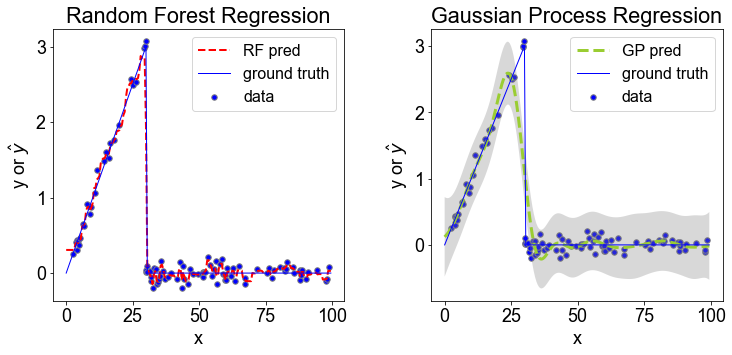

In [13]:
# Fit Random Forest regression model
regr_RF = RandomForestRegressor()
regr_RF.fit(X_train, y_train)
y_test_RFpred = regr_RF.predict(X_test)

gp_kernel = RBF() + WhiteKernel()
regr_GP = GaussianProcessRegressor(kernel=gp_kernel)
regr_GP.fit(X_train, y_train)
y_test_GPpred, y_test_GPstd = regr_GP.predict(X_test, return_std=True)


plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].plot(X_test, y_test_RFpred, '--', color="red", label="RF pred", linewidth=2)
axes[1].plot(X_test, y_test_GPpred, '--', color="yellowgreen", label="GP pred", linewidth=3)
axes[1].fill(np.concatenate([X_test, X_test[::-1]]),
             np.concatenate([y_test_GPpred - y_test_GPstd,
                            (y_test_GPpred + y_test_GPstd)[::-1]]), alpha=.3, fc='gray', ec='None')

for i in range(len(axes)):
    axes[i].scatter(X_train, y_train, s=30, edgecolor="gray", c="blue", label="data")
    axes[i].plot(X_test, y_test, color="blue", label="ground truth", linewidth=1)
    axes[i].set_xlabel("x")
    axes[i].set_ylabel(r"y or $\^y$")
    axes[i].legend(fontsize = 16)
    
axes[0].set_title("Random Forest Regression")
axes[1].set_title("Gaussian Process Regression")

plt.subplots_adjust(wspace = 0.3)
plt.show()


Test data root mean squared error:


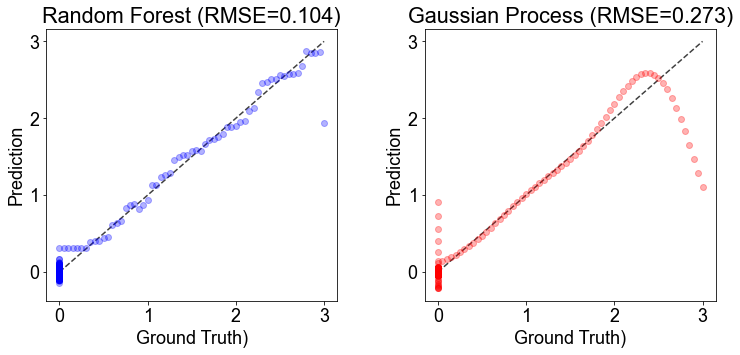

In [14]:
print('Test data root mean squared error:' )
plot_predictions([y_test, y_test], [y_test_RFpred, y_test_GPpred],    labels=['Random Forest', 'Gaussian Process'])